# 모듈 Import

- 변수명 정의서

| 변수명 | 설명|추가한 파생변수|
|---|---|---|
|df_a|A마트 (product)|
|df_b|B마트 (product)|
|df_c|C마트 (product)|
|df_d|D마트 (product)|
|df|A,B,C,D 마트 데이터를 합쳐놓은 것|
|member|회원정보 데이터|
|**member_modi** (최종 사용)| 회원정보 데이터를 수정한 데이터|구매횟수, 최근 구매일자, 총구매금액, 연령대, 주구매매장, 거리등급을 추가한 데이터|
|**df_join** (최종 사용) | df_sold와 member_modi를 합쳐놓은 데이터|
|**df_sold** (최종 사용)| 반품데이터, 증정품 제거, 구매수량 0 제거, 쿠폰북 상품 제거|계절, 구매시간대|
|df_return| 반품 데이터 보관|
|df_give| 증정품 데이터 보관|


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## 시간다루는 모듈
import datetime as dt

## python 설정
pd.options.display.float_format = '{:.2f}'.format
pd.reset_option('display.float_format')

from sklearn.model_selection import train_test_split

import copy

# 데이터 불러오기

In [2]:
## 불러올때마다 엑셀 파일 들어있는 폴더 가져오기
path = '/Users/mansuson/Desktop/bigdata/A2_대형마트/데이터셋'
# path = r'C:\Users\cowls\바탕 화면/A2_대형마트'
# path = '/home/piai/다운로드/A2_대형마트'

In [3]:
df_c = pd.read_csv(path + '/product_data_001.csv', encoding = 'utf-8', parse_dates= ['공급일자','반품_원거래일자','구매시각'])
df_d = pd.read_csv(path + '/product_data_002.csv', encoding = 'utf-8', parse_dates= ['공급일자','반품_원거래일자','구매시각'])
df_b = pd.read_csv(path + '/product_data_003.csv', encoding = 'utf-8', parse_dates= ['공급일자','반품_원거래일자','구매시각'])
df_a = pd.read_csv(path + '/product_data_004.csv', encoding = 'utf-8', parse_dates= ['공급일자','반품_원거래일자','구매시각'])
member = pd.read_csv(path + '/member_data.csv', encoding = 'utf-8')
# member_modi = pd.read_csv(path + '/member_modify.csv', encoding = 'utf-8', parse_dates=['최근구매일자']) ## 수정된 사람

/var/folders/kg/2nf2sj7525b36vm0888t1whm0000gn/T/ipykernel_70393/2408486131.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_c = pd.read_csv(path + '/product_data_001.csv', encoding = 'utf-8', parse_dates= ['공급일자','반품_원거래일자','구매시각'])
/var/folders/kg/2nf2sj7525b36vm0888t1whm0000gn/T/ipykernel_70393/2408486131.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_d = pd.read_csv(path + '/product_data_002.csv', encoding = 'utf-8', parse_dates= ['공급일자','반품_원거래일자','구매시각'])
/var/folders/kg/2nf2sj7525b36vm0888t1whm0000gn/T/ipykernel_70393/2408486131.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected,

In [4]:
df_addr = pd.read_csv(path + '/address_data.csv', encoding='utf-8')
df_store = pd.read_csv(path + '/store_address.csv', encoding='utf-8')

## 데이터 병합
- 이름 : df

In [5]:
df = pd.concat([df_a,df_b,df_c,df_d], axis = 0)
df.reset_index(drop = True, inplace = True)

## 이상치 제거
df.drop(df[df['회원번호']==1527053696].index,inplace=True)
df.drop(df[df['회원번호']==545864448].index,inplace=True)
df.drop(df[df['회원번호']==383599936].index, inplace=True)
df.describe(include = 'all')

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,구매시각
count,294625,2.946250e+05,294625,294625,294625,294625,294625,294625.000000,2.946250e+05,294625,4960,294625
unique,NaN,NaN,4,16,64,391,2419,NaN,NaN,4,NaN,NaN
top,NaN,NaN,정상회원,채소,두부/유부,두부,두부(1모:420g),NaN,NaN,매장C,NaN,NaN
freq,NaN,NaN,291351,75964,21026,18791,10754,NaN,NaN,123191,NaN,NaN
mean,2022-05-30 09:02:15.959949056,7.395845e+08,NaN,NaN,NaN,NaN,NaN,1.142066,1.104771e+04,NaN,2022-06-05 12:56:36.774193920,2023-08-15 14:30:24.097343744
min,2022-01-01 00:00:00,1.861382e+07,NaN,NaN,NaN,NaN,NaN,-50.000000,-6.662160e+05,NaN,2022-01-02 00:00:00,2023-08-15 08:08:00
25%,2022-03-16 00:00:00,3.839210e+08,NaN,NaN,NaN,NaN,NaN,1.000000,4.020000e+03,NaN,2022-03-24 00:00:00,2023-08-15 11:57:00
50%,2022-06-01 00:00:00,7.450931e+08,NaN,NaN,NaN,NaN,NaN,1.000000,7.370000e+03,NaN,2022-06-09 00:00:00,2023-08-15 14:28:00
75%,2022-08-13 00:00:00,1.051940e+09,NaN,NaN,NaN,NaN,NaN,1.000000,1.320900e+04,NaN,2022-08-22 06:00:00,2023-08-15 16:51:00
max,2022-10-30 00:00:00,1.670621e+09,NaN,NaN,NaN,NaN,NaN,50.000000,2.890766e+06,NaN,2022-11-02 00:00:00,2023-08-15 20:52:00


## 반품 데이터 처리

In [6]:
df[df['구매금액'] < 0].shape ## 5372 행

df_return = df[(df['구매금액'] < 0) | (df['구매수량'] < 0)]
df_sold = df.drop(df_return.index, axis = 0)

### 특이점에 대한 고찰
구매금액이 0으로 나타난 물품 중 **증정** 상품 존재.   
해당 물품을 어떻게 처리할지에 대한 논의 후 두 가지 방안 도출.
1. 제거
2. 증정 날짜 비교

In [7]:
len(df_sold[df_sold['물품명'].str.contains('증정')]['물품명'])

282

In [8]:
df_sold[df_sold['물품명'].str.contains('증정')]['물품명'].value_counts()

물품명
중성세제 샘플(증정/100㎖)         90
자연그대로 아토크림(증정/15g)       73
쌀 만난 반가米 증정품(사각휴지3상자)    49
두부(반모:270g)/증정           47
에코백(증정)성남용인              22
자원순환 텀블러 홀더(증정)           1
Name: count, dtype: int64

In [9]:
df_give = df_sold[df_sold['물품명'].str.contains('증정')]

df_sold = df_sold.drop(df_sold[df_sold['물품명'].str.contains('증정')].index, axis = 0)

df_sold

print(df_give.shape)

(282, 12)


## 판매 데이터 파생변수 생성

In [10]:
# 계절 파생변수
df_sold['계절']=df_sold['공급일자'].apply(lambda x: '겨울' if (x.month==1)|(x.month==2) else '봄' if x.month in [3,4,5] else '여름' if x.month in [6,7,8] else '가을')

# 구매 시간대 파생변수
def times(t) :
    if t in [8, 9] :
        return '오픈'
    elif t in [10, 11, 12] :
        return '오전'
    elif t in [13, 14, 15] :
        return '오후'
    elif t in [16, 17, 18] :
        return '저녁'
    else :
        return '마감'
    
df_sold['구매시간대'] = df_sold['구매시각'].apply(lambda x : times(x.hour))

## 구매수량 0인 얘 삭제

In [11]:
print(df_sold[df_sold['구매수량'] == 0].shape)
print(df_sold[df_sold['구매수량'] <= 0].shape)
df_sold = df_sold[df_sold['구매수량'] > 0]

(65, 14)
(65, 14)


## 쿠폰북 삭제

In [12]:
print(len(df_sold[df_sold['물품명'].str.contains('쿠폰')]))
df_sold.drop(df_sold[df_sold['물품명'].str.contains('쿠폰')].index , axis = 0 ,inplace = True)

139


## 추가 수정!!!

In [13]:
df_sold.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288762 entries, 0 to 294644
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   공급일자      288762 non-null  datetime64[ns]
 1   회원번호      288762 non-null  int64         
 2   조합원상태     288762 non-null  object        
 3   물품대분류     288762 non-null  object        
 4   물품중분류     288762 non-null  object        
 5   물품소분류     288762 non-null  object        
 6   물품명       288762 non-null  object        
 7   구매수량      288762 non-null  float64       
 8   구매금액      288762 non-null  int64         
 9   구매매장      288762 non-null  object        
 10  반품_원거래일자  4 non-null       datetime64[ns]
 11  구매시각      288762 non-null  datetime64[ns]
 12  계절        288762 non-null  object        
 13  구매시간대     288762 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(8)
memory usage: 33.0+ MB


- 반품 원거래일자 존재하지만 구매금액이 양수로 표현된 데이터 (**이상치**) 제거

In [14]:
tmp = df_sold[df_sold['반품_원거래일자'].notnull()]      # 4행
df_sold = df_sold.drop(tmp.index, axis=0)

In [15]:
# 반품 원거래일자 컬럼 삭제
df_sold.drop('반품_원거래일자', axis=1, inplace=True)
df_sold.columns

Index(['공급일자', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장', '구매시각', '계절', '구매시간대'],
      dtype='object')

## member 수정 (참조)

- member파일에 각 회원의 구매횟수, 최근 구매일자, 총구매금액, 연령대 추가 코드
- 1. 멤버별 구매횟수, 최근 구매일자, 총구매금액 코드

In [16]:
# member.drop(member[member['성별'].isnull()].index,axis = 0, inplace = True)
# member.drop(member[member['연령'].isnull()].index,axis = 0, inplace = True)

In [17]:
# for member_code in member['회원번호']:
#     customer = member[member['회원번호']==member_code]
#     count_buying=(df_sold['회원번호']==member_code).sum()

#     member.loc[customer.index,'구매횟수']=count_buying
#     recent_buying=df_sold[df_sold['회원번호']==member_code]['공급일자'].max()
#     member.loc[customer.index,'최근구매일자'] = recent_buying
#     member.loc[customer.index,'총구매금액'] =(df_sold[df_sold['회원번호']==member_code]['구매금액']).sum()

# # 연령 범위와 라벨 정의
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,float('inf')]
# labels = ["0대", "10대", "20대", "30대", "40대", "50대", "60대", "70대", "80대", "90대이상"]
# # 연령 범위에 따라 범주형 변수 생성
# member['연령대'] = pd.cut(member['연령'], bins=bins, labels=labels, right=False)
# member.to_csv(path + '/member_modify.csv', encoding = 'utf-8',index = False)

In [18]:
member_modi = pd.read_csv(path + '/member_modify.csv', encoding = 'utf-8', parse_dates=['최근구매일자']) ## 수정된 사람


## product 와 member join

In [19]:
df_join = pd.merge(df_sold,member_modi,how = 'left', on = ['회원번호','조합원상태'])
df_join.head()

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매횟수,최근구매일자,총구매금액,연령대
0,2022-01-01,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장A,...,수지구-동천동,남,51.0,미신청,수신,normal,315.0,2022-10-29,3266560.0,50대
1,2022-01-01,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977,매장A,...,분당구-구미동,여,48.0,신청,.,normal,55.0,2022-10-29,662576.0,40대
2,2022-01-01,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,...,수지구-동천동,여,50.0,미신청,.,normal,17.0,2022-08-09,148270.0,50대
3,2022-01-01,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,...,수지구-동천동,여,38.0,미신청,.,normal,6.0,2022-01-07,60304.0,30대
4,2022-01-01,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,...,분당구-판교동,여,50.0,미신청,.,normal,11.0,2022-09-08,108930.0,50대


### 거리등급 파생변수

In [20]:
# 주소 이상치 처리
odd_address={'기타-금광동':'중원구-금광동','기타-신흥동':'수정구-신흥동','기타-금곡동':'분당구-금곡동', '기타-동천동':'수지구-동천동',
             '기타-중앙동':'중원구-중앙동','기타-보라동':'기흥구-보라동','기타-동백동':'기흥구-동백동','기타-은행동':'중원구-은행동',
             '화성-보라동':'기흥구-보라동','기타-궁내동':'분당구-궁내동','기타-율동':'분당구-율동','기타-태평동':'수정구-태평동',
             '기타-성남동':'중원구-성남동', '서울 강남구-은행동':'중원구-은행동', '광주-산성동':'수정구-산성동',
             '수정구-상대원동':'중원구-상대원동', '분당구-중동':'중원구-중앙동'}

for ind in member_modi.index:
    if member_modi.iloc[ind,2] in odd_address.keys():
        member_modi.iloc[ind,2]=odd_address[member_modi.iloc[ind,2]]

In [21]:
import math

# 직선거리 계산 함수
def distance_points(x1, y1, x2, y2) :
    dx = x2 - x1
    dy = y2 - y1
    dist = math.sqrt(dx**2 + dy**2)
    return distance_levels(dist)

In [22]:
# 직선거리에 따른 거리등급 반환 함수
def distance_levels(dist) :
    if (dist < 0.05) & (dist > 0) :
        level = 5
    elif (dist < 0.1) & (dist >= 0.05) :
        level = 4
    elif (dist < 0.15) & (dist >= 0.1) :
        level = 3
    elif (dist < 0.2) & (dist >= 0.15) :
        level = 2
    else :
        level = 1
    
    return level

In [23]:
# 회원 별 가장 많이 방문한 매장(주구매매장) 선정
grouped = df_join.groupby(['회원번호', '구매매장'])['구매횟수'].sum()

max_pur = grouped.groupby('회원번호').idxmax()
max_pur_df = pd.DataFrame(grouped.loc[max_pur])

pur_store = max_pur_df.iloc[:, 1:]
result_df = pur_store.reset_index()

In [24]:
result_df['주구매매장'] = result_df['구매매장']
result_df.drop('구매매장', axis=1, inplace=True)
result_df

,회원번호,주구매매장
0,18613824,매장C
1,18764160,매장D
2,18792000,매장C
3,18942336,매장D
4,18949760,매장C
...,...,...
11528,1644772352,매장B
11529,1644957952,매장D
11530,1670400000,매장C
11531,1670606016,매장C


In [25]:
# 고객 정보 데이터와 결합
member_modi = pd.merge(left = member_modi , right = df_addr, on = ['주소'],how = 'outer')
member_modi.drop(['도로명주소'], axis = 1, inplace = True)
member_modi = pd.merge(left = member_modi, right = result_df, on = ['회원번호'], how = 'outer')
member_modi = pd.merge(left = member_modi, right = df_store , on = ['주구매매장'], how = 'outer')
member_modi.drop('도로명주소', axis = 1, inplace = True)

In [26]:
# 거리등급 계산
member_modi['거리등급'] = member_modi.apply(lambda x : distance_points(x['Latitude_x'], x['Longitude_x'], x['Latitude_y'], x['Longitude_y']), axis = 1)
member_modi.drop(['Latitude_x','Longitude_x','Latitude_y','Longitude_y'], axis = 1, inplace = True)
member_modi['거리등급'].value_counts()

거리등급
5    8788
1    1943
4     627
3     164
2      30
Name: count, dtype: int64

***
# RFM

## RFM은 member_rfm이라는 다른 데이터프레임으로 저장

### RFM 등급 분할 방법
- Customer Quintile Method
    1. 기존에 소개했던 방법으로 단순히 20%씩 구간에 할당해주는 방법
    1. 이 경우에는, 같은 구간이더라도 구간 내에서 값의 크기 차가 큰 경우에는 그 특성이 상이할 수 있다.
    1. 표본의 크기가 작은 경우에는 오히려 비슷한 값을 가져도 다른 등급을 가질 수 있다.
- Behavior Quintile Method (by John Wirth)
    1. R, F, M값의 분포에 따라 다르게 구간을 분할해주는 방식으로, R, F, M 각각에 대한 구간 분할 방법이 다르며, 이는 아래에서 설명하도록 함
- 얘의 출처
    J R Miglautsch, 2000, "Thoughts on RFM scoring", Journal of Database Marketing & Customer Strategy Management, vol.8, pp. 67–72

### Recency 만들기
- 구간 분할 방법
단순하게 (1,2월은 1점),(3,4월은 2점),(5,6월은 3점),(7,8월은 4점),(9,10월은 5점)으로 분할

In [27]:
reference_date=member_modi['최근구매일자'].max()
member_rfm=copy.deepcopy(member_modi)

In [28]:
for n in range(1,6):
    cond=(member_rfm['최근구매일자'].dt.month==2*n-1)|(member_rfm['최근구매일자'].dt.month==2*n)
    member_rfm.loc[cond,'recency']=n
member_rfm

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매횟수,최근구매일자,총구매금액,연령대,주구매매장,거리등급,recency
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,1.0,2022-06-13,7658.0,50대,매장B,5,3.0
1,1004699200,정상회원,수지구-풍덕천동,여,40.0,미신청,.,normal,2.0,2022-05-24,23930.0,40대,매장B,5,3.0
2,1005059264,정상회원,수지구-풍덕천동,여,39.0,미신청,.,normal,166.0,2022-10-30,1471084.0,30대,매장B,5,5.0
3,1009381888,정상회원,수지구-풍덕천동,여,44.0,미신청,.,normal,1.0,2022-10-10,7083.0,40대,매장B,5,5.0
4,1010820288,정상회원,수지구-풍덕천동,여,37.0,미신청,.,normal,17.0,2022-09-12,97253.0,30대,매장B,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11547,603424576,정상회원,기타-기타,여,36.0,미신청,.,normal,0.0,NaT,0.0,30대,NaN,1,NaN
11548,999474560,정상회원,기타-기타,여,40.0,미신청,.,normal,0.0,NaT,0.0,40대,NaN,1,NaN
11549,57302144,정상회원,분당구-백현동,여,55.0,미신청,.,normal,0.0,NaT,0.0,50대,NaN,1,NaN
11550,554437312,정상회원,수지구-죽전동,여,63.0,미신청,.,normal,0.0,NaT,0.0,60대,NaN,1,NaN


### Frequency 만들기
- 구간 분할 방법 예
    1. 1회 구매자들에게는 1점을 준다.
    1. 1점을 제외하고, 남은 고객들의 빈도를 평균내어 평균보다 낮은 그룹에게 2점을 준다.
    1. 반복하여 4점까지 만들고, 남은 고객들은 5점을 할당한다.

In [29]:
member_rfm['frequency']=0
member_rfm.loc[member_rfm['구매횟수']==1,'frequency']=1
for n in range(2,6):
    if n==5:
        member_rfm.loc[member_rfm['frequency']==0,'frequency']=n
    else:
        freq_mean=member_rfm[member_rfm['frequency']==0]['구매횟수'].mean()
        member_rfm.loc[(member_rfm['frequency']==0)&(member_rfm['구매횟수']<freq_mean),'frequency']=n

- frequency의 구간별 전체 인원에 대한 비율 확인

In [30]:
print(len(list(member_rfm[member_rfm['frequency']==1].index))/len(list(member_rfm.index)))
print(len(list(member_rfm[member_rfm['frequency']==2].index))/len(list(member_rfm.index)))
print(len(list(member_rfm[member_rfm['frequency']==3].index))/len(list(member_rfm.index)))
print(len(list(member_rfm[member_rfm['frequency']==4].index))/len(list(member_rfm.index)))
print(len(list(member_rfm[member_rfm['frequency']==5].index))/len(list(member_rfm.index)))

0.14932479224376732
0.6067347645429363
0.16204986149584488
0.05453601108033241
0.027354570637119113


### Monetary 만들기
- 구간 분할 방법
1. 각 구간의 인원별 총구매금액의 합이 모두 동일하게 구간을 선정해줌 (즉, 1점짜리들의 총 구매금액의 합=2점짜리들의 총 구매금액의 합=...)

In [31]:
mon_list=list(member_rfm['총구매금액'].values)
mon_list.sort()
mon_5=sum(mon_list)/5
a=[]
for n in range(5):
    su=[]
    if n==4:
        a.append(mon_list)
        break
    for val in mon_list:
        su.append(val)
        if sum(su)>mon_5:
            su.remove(val)
            break
    mon_list=[val for val in mon_list if val not in su]
    a.append(su)
for n in range(len(a)):
    a[n]=list(set(a[n]))
for n in range(len(a)):
    for val in a[n]:
        member_rfm.loc[member_rfm['총구매금액']==val,'monetary']=n+1

In [32]:
member_rfm[member_rfm['monetary']==5]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,구매횟수,최근구매일자,총구매금액,연령대,주구매매장,거리등급,recency,frequency,monetary
108,1283121472,정상회원,수지구-풍덕천동,남,73.0,미신청,.,VIP,246.0,2022-10-26,5264136.0,70대,매장B,5,5.0,5,5.0
214,235238720,정상회원,수지구-풍덕천동,여,58.0,미신청,.,normal,162.0,2022-10-28,2245590.0,50대,매장B,5,5.0,5,5.0
225,279595264,정상회원,수지구-풍덕천동,여,53.0,미신청,수신,VIP,252.0,2022-10-29,2978734.0,50대,매장B,5,5.0,5,5.0
233,351053120,정상회원,수지구-풍덕천동,여,48.0,미신청,.,normal,233.0,2022-10-28,3585888.0,40대,매장B,5,5.0,5,5.0
291,606984384,정상회원,수지구-풍덕천동,여,51.0,미신청,수신,VIP,290.0,2022-10-29,5843751.0,50대,매장B,5,5.0,5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,763281856,정상회원,수지구-성복동,여,41.0,미신청,수신,normal,187.0,2022-10-24,2058822.0,40대,매장D,5,5.0,5,5.0
11190,862820992,정상회원,수지구-성복동,남,53.0,미신청,.,normal,169.0,2022-10-24,2199551.0,50대,매장D,5,5.0,5,5.0
11192,898628800,정상회원,수지구-성복동,여,49.0,미신청,수신,VIP,223.0,2022-10-29,3504790.0,40대,매장D,5,5.0,5,5.0
11452,476030592,정상회원,수지구-기타,여,49.0,미신청,수신,VIP,355.0,2022-10-29,4187583.0,40대,매장D,1,5.0,5,5.0


- monetary의 구간별 총구매금액의 합이 동일한지 확인, 동일

In [33]:
print(member_rfm[member_rfm['monetary']==1]['총구매금액'].sum())
print(member_rfm[member_rfm['monetary']==2]['총구매금액'].sum())
print(member_rfm[member_rfm['monetary']==3]['총구매금액'].sum())
print(member_rfm[member_rfm['monetary']==4]['총구매금액'].sum())
print(member_rfm[member_rfm['monetary']==5]['총구매금액'].sum())

666540611.0
666595657.0
666016295.0
665550261.0
669303550.0


### RFM 총 점수 구하기
- r에 0.3, f에 0.3, m에 0.4의 가중치를 제공함
- 그 근거: 교수님..


#J R Miglautsch, 2000, "Thoughts on RFM scoring", Journal of Database Marketing & Customer Strategy Management, vol.8, pp. 67–72

In [34]:
member_rfm['RFM']=member_rfm['recency']*0.3+member_rfm['frequency']*0.3+member_rfm['monetary']*0.4

### RFM 점수(1~5) 구하기
- 구간 분할 방법은 frequency와 동일

In [35]:
member_rfm['RFM_score']=0
for n in range(1,6):
    if n==5:
        member_rfm.loc[member_rfm['RFM_score']==0,'RFM_score']=n
    else:
        RFM_mean=member_rfm[member_rfm['RFM_score']==0]['RFM'].mean()
        member_rfm.loc[(member_rfm['RFM_score']==0)&(member_rfm['RFM']<RFM_mean),'RFM_score']=n

- 구간 분할 결과, 각각 전체의 몇퍼센트인지 확인

In [36]:
print(len(list(member_rfm[member_rfm['RFM_score']==1].index))/len(list(member_rfm.index)))
print(len(list(member_rfm[member_rfm['RFM_score']==2].index))/len(list(member_rfm.index)))
print(len(list(member_rfm[member_rfm['RFM_score']==3].index))/len(list(member_rfm.index)))
print(len(list(member_rfm[member_rfm['RFM_score']==4].index))/len(list(member_rfm.index)))
print(len(list(member_rfm[member_rfm['RFM_score']==5].index))/len(list(member_rfm.index)))

0.41862880886426596
0.35612880886426596
0.140148891966759
0.05462257617728532
0.030470914127423823


#### csv 파일로 저장

In [37]:
#member_rfm.to_csv('member_rfm.csv',index=False, encoding = 'utf-8')

In [38]:
member_modi = member_rfm

In [39]:
df_join = pd.merge(df_sold,member_modi,how = 'left', on = ['회원번호','조합원상태'])
df_join.columns

Index(['공급일자', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장', '구매시각', '계절', '구매시간대', '주소', '성별', '연령', '배송서비스신청여부',
       '모바일알람여부', 'Gold_member', '구매횟수', '최근구매일자', '총구매금액', '연령대', '주구매매장',
       '거리등급', 'recency', 'frequency', 'monetary', 'RFM', 'RFM_score'],
      dtype='object')

## 데이터 정제 전, 정제 후 비교

In [40]:
print('데이터 정제 전 : ', df.shape)
print('데이터 정제 후 : ', df_sold.shape)

print('개수 : ', df.shape[0] - df_sold.shape[0])
print('비율 : {:.3f}'.format((df.shape[0] - df_sold.shape[0]) / df.shape[0]))

데이터 정제 전 :  (294625, 12)
데이터 정제 후 :  (288758, 13)
개수 :  5867
비율 : 0.020


In [41]:
df_join.isnull().sum()

공급일자           0
회원번호           0
조합원상태          0
물품대분류          0
물품중분류          0
물품소분류          0
물품명            0
구매수량           0
구매금액           0
구매매장           0
구매시각           0
계절             0
구매시간대          0
주소             0
성별             0
연령             0
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
구매횟수           0
최근구매일자         0
총구매금액          0
연령대            0
주구매매장          0
거리등급           0
recency        0
frequency      0
monetary       0
RFM            0
RFM_score      0
dtype: int64

In [42]:
print(df_join.shape)
print(df.shape)
print(member_modi.shape)

(288758, 30)
(294625, 12)
(11552, 19)


In [43]:
(288758, 30)
(294625, 12)
(11552, 19)

(11552, 19)

## 파생변수

In [44]:
import re
df_join['물품명_분리'] = df_join['물품명'].apply(lambda x : re.split('[(/)]', x)).str[0]

## 시계열 예측

In [45]:
product_top6 = pd.DataFrame({'물품A' : df_join[df_join['구매매장'] == '매장A']['물품명_분리'].value_counts()[:6].index,
            '매장A' : df_join[df_join['구매매장'] == '매장A']['물품명_분리'].value_counts()[:6].to_list(),
            '물품B' : df_join[df_join['구매매장'] == '매장B']['물품명_분리'].value_counts()[:6].index,
            '매장B' : df_join[df_join['구매매장'] == '매장B']['물품명_분리'].value_counts()[:6].to_list(),
            '물품C' : df_join[df_join['구매매장'] == '매장C']['물품명_분리'].value_counts()[:6].index,
            '매장C' : df_join[df_join['구매매장'] == '매장C']['물품명_분리'].value_counts()[:6].to_list(),
            '물품D' : df_join[df_join['구매매장'] == '매장D']['물품명_분리'].value_counts()[:6].index,
            '매장D' : df_join[df_join['구매매장'] == '매장D']['물품명_분리'].value_counts()[:6].to_list()})

In [46]:
df_dt = df_join.set_index('공급일자',drop = True)
df_dt

,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,구매시각,...,총구매금액,연령대,주구매매장,거리등급,recency,frequency,monetary,RFM,RFM_score,물품명_분리
공급일자,,,,,,,,,,,,,,,,,,,,,
2022-01-01,220954944,정상회원,반찬,두부/유부,두부,두부(1모:420g),1.0,3829,매장A,2023-08-15 10:32:00,...,3266560.0,50대,매장A,5,5.0,5,5.0,5.0,5,두부
2022-01-01,89023040,정상회원,채소,열매채소,단호박/손질,단호박(깍뚝썰기/300g),1.0,4977,매장A,2023-08-15 10:41:00,...,662576.0,40대,매장A,5,5.0,3,3.0,3.6,3,단호박
2022-01-01,354941440,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,2023-08-15 11:00:00,...,148270.0,50대,매장C,5,4.0,2,1.0,2.2,1,유정란
2022-01-01,786634048,탈퇴,반찬,어묵/묵,묵,도토리묵(420g:1모),1.0,7083,매장A,2023-08-15 11:28:00,...,60304.0,30대,매장A,5,1.0,2,1.0,1.3,1,도토리묵
2022-01-01,438543104,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장A,2023-08-15 11:59:00,...,108930.0,50대,매장A,4,5.0,2,1.0,2.5,2,유정란
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-30,560448896,정상회원,주곡,멥쌀,멥쌀,백미/유(2kg),1.0,15315,매장D,2023-08-15 13:16:00,...,994534.0,40대,매장D,5,5.0,4,3.0,3.9,4,백미
2022-10-30,68976384,정상회원,채소,잎/줄기채소,시금치,시금치(300g),2.0,6892,매장D,2023-08-15 11:08:00,...,1834601.0,50대,매장D,5,5.0,4,4.0,4.3,4,시금치
2022-10-30,1519813440,정상회원,반찬,밑반찬,김가공,구운자른김(15g*3봉),1.0,7466,매장D,2023-08-15 14:27:00,...,1033016.0,30대,매장D,5,5.0,4,3.0,3.9,4,구운자른김


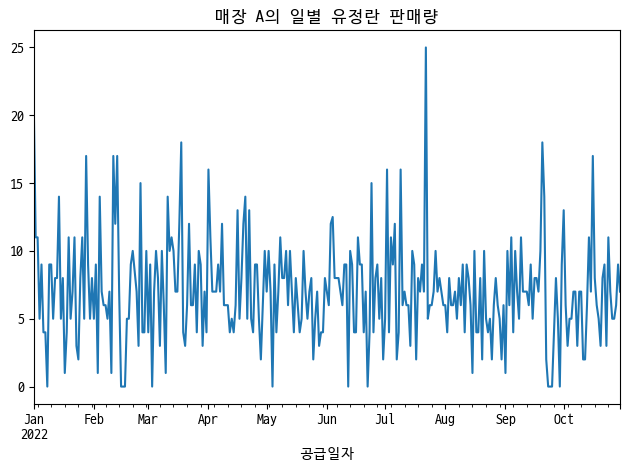

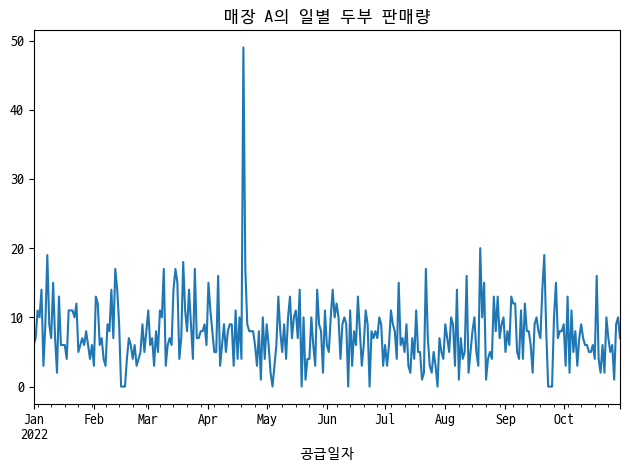

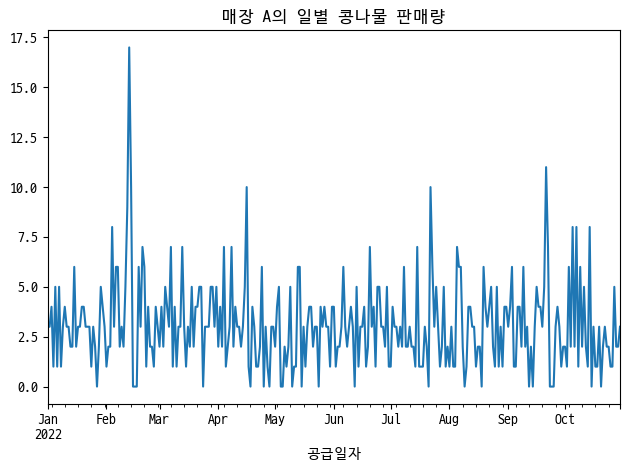

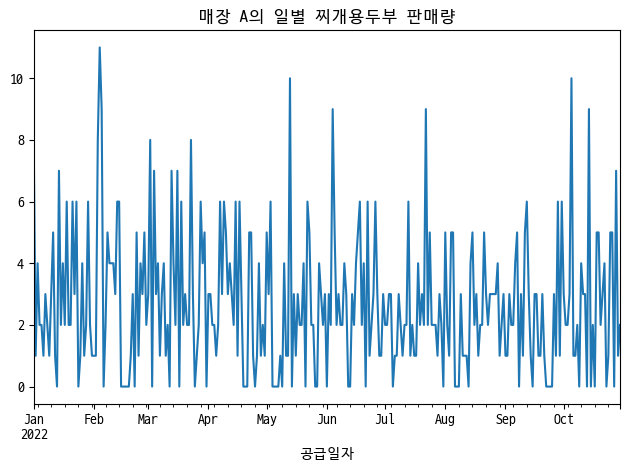

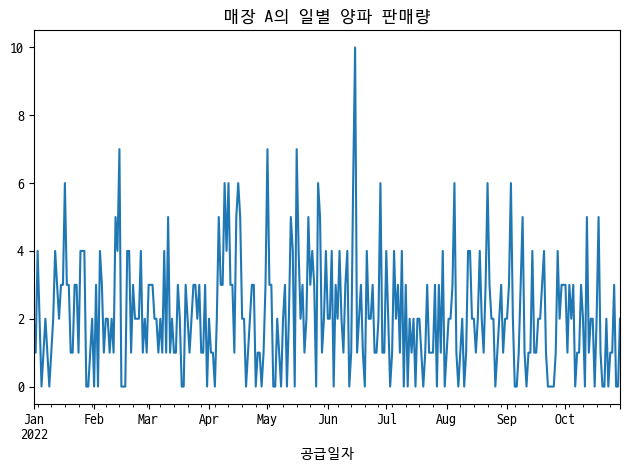

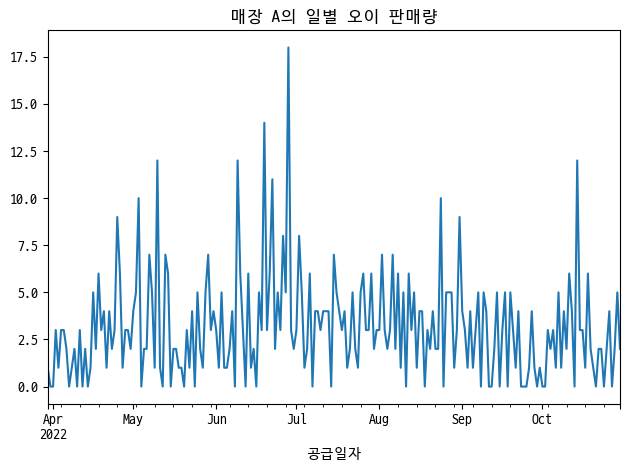

In [47]:
for product in product_top6['물품A']:
    df_dt[(df_dt['물품명_분리'] == product) & (df_dt['구매매장'] == '매장A')]['구매수량'].resample('D').sum().plot(title = '매장 A의 일별 {} 판매량'.format(product)) ## 일별
    # df_dt[(df_dt['물품명_분리'] == product) & (df_dt['구매매장'] == '매장A')]['구매수량'].resample('W').sum().plot(title = '매장 A의 분기별 {} 판매량'.format(product)) ## 주별
    # df_dt[(df_dt['물품명_분리'] == product) & (df_dt['구매매장'] == '매장A')]['구매수량'].resample('M').sum().plot(title = '매장 A의 월별 {} 판매량'.format(product)) ## 월별
    # df_dt[(df_dt['물품명_분리'] == product) & (df_dt['구매매장'] == '매장A')]['구매수량'].resample('Q').sum().plot(title = '매장 A의 분기별 {} 판매량'.format(product)) ## 분기별
    plt.tight_layout()
    plt.show()


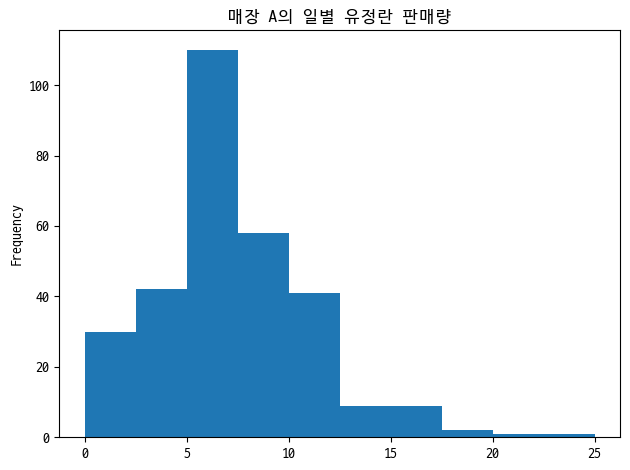

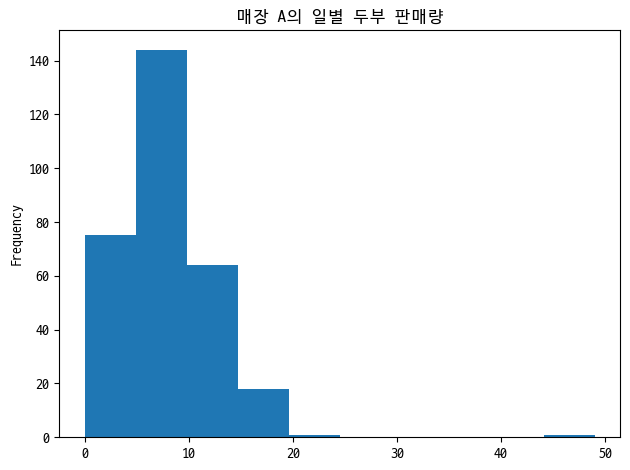

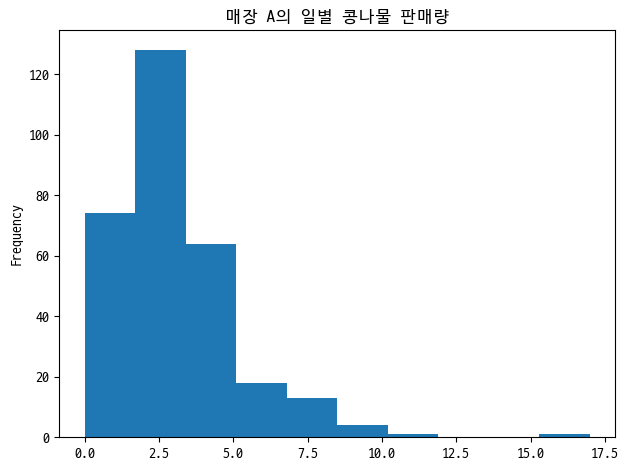

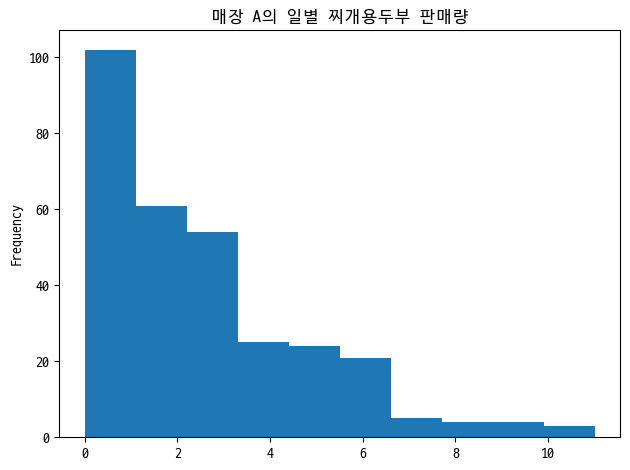

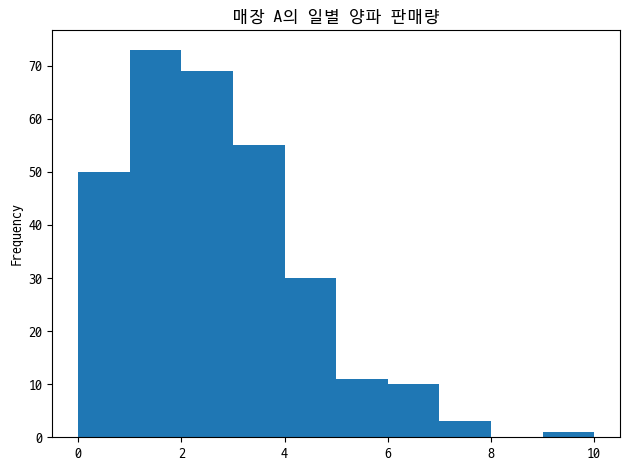

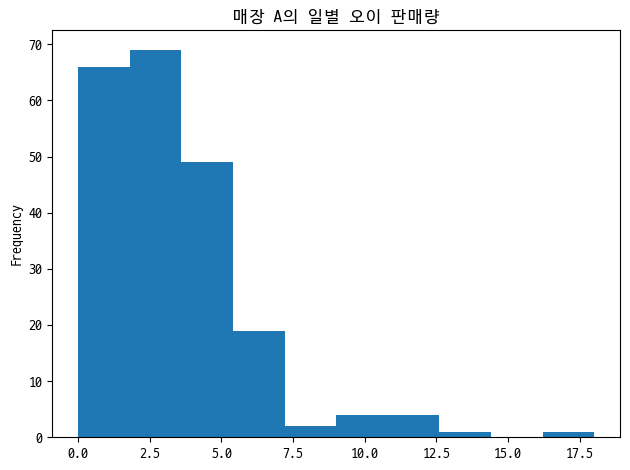

In [48]:
for product in product_top6['물품A']:
    df_dt[(df_dt['물품명_분리'] == product) & (df_dt['구매매장'] == '매장A')]['구매수량'].resample('D').sum().plot(kind = 'hist',title = '매장 A의 일별 {} 판매량'.format(product)) ## 일별
    # df_dt[(df_dt['물품명_분리'] == product) & (df_dt['구매매장'] == '매장A')]['구매수량'].resample('W').sum().plot(title = '매장 A의 분기별 {} 판매량'.format(product)) ## 주별
    # df_dt[(df_dt['물품명_분리'] == product) & (df_dt['구매매장'] == '매장A')]['구매수량'].resample('M').sum().plot(title = '매장 A의 월별 {} 판매량'.format(product)) ## 월별
    # df_dt[(df_dt['물품명_분리'] == product) & (df_dt['구매매장'] == '매장A')]['구매수량'].resample('Q').sum().plot(title = '매장 A의 분기별 {} 판매량'.format(product)) ## 분기별
    plt.tight_layout()
    plt.show()


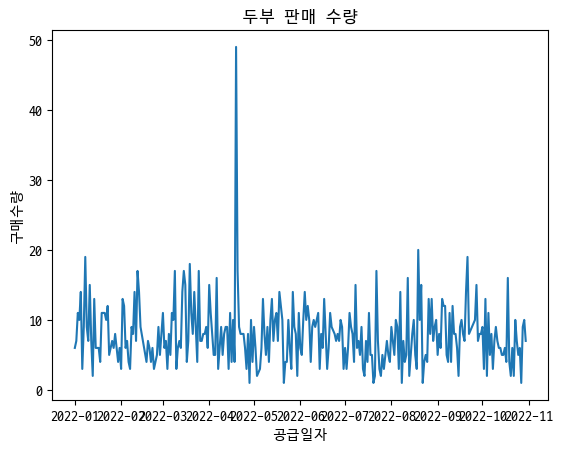

In [49]:
def product(item, market):
    df_product = df_join[(df_join['물품명_분리'] == item) & (df_join['구매매장'] == market)]
    df_product_date = pd.DataFrame(df_product.groupby('공급일자')['구매수량'].sum())
    df_product_date['구매수량']
    sns.lineplot(x = df_product_date.index , y = df_product_date['구매수량'])
    plt.title('두부 판매 수량')

product('두부','매장A')

- 이날 두부가 많이 팔릴 예정이에요 미리 쟁겨두세요

In [50]:
df_dt_a = df_dt[df_dt['구매매장'] == '매장A'][['구매수량']].resample('D').sum()
df_dt_b = df_dt[df_dt['구매매장'] == '매장B'][['구매수량']].resample('D').sum()
df_dt_c = df_dt[df_dt['구매매장'] == '매장C'][['구매수량']].resample('D').sum()
df_dt_d = df_dt[df_dt['구매매장'] == '매장D'][['구매수량']].resample('D').sum()

<Axes: xlabel='공급일자'>

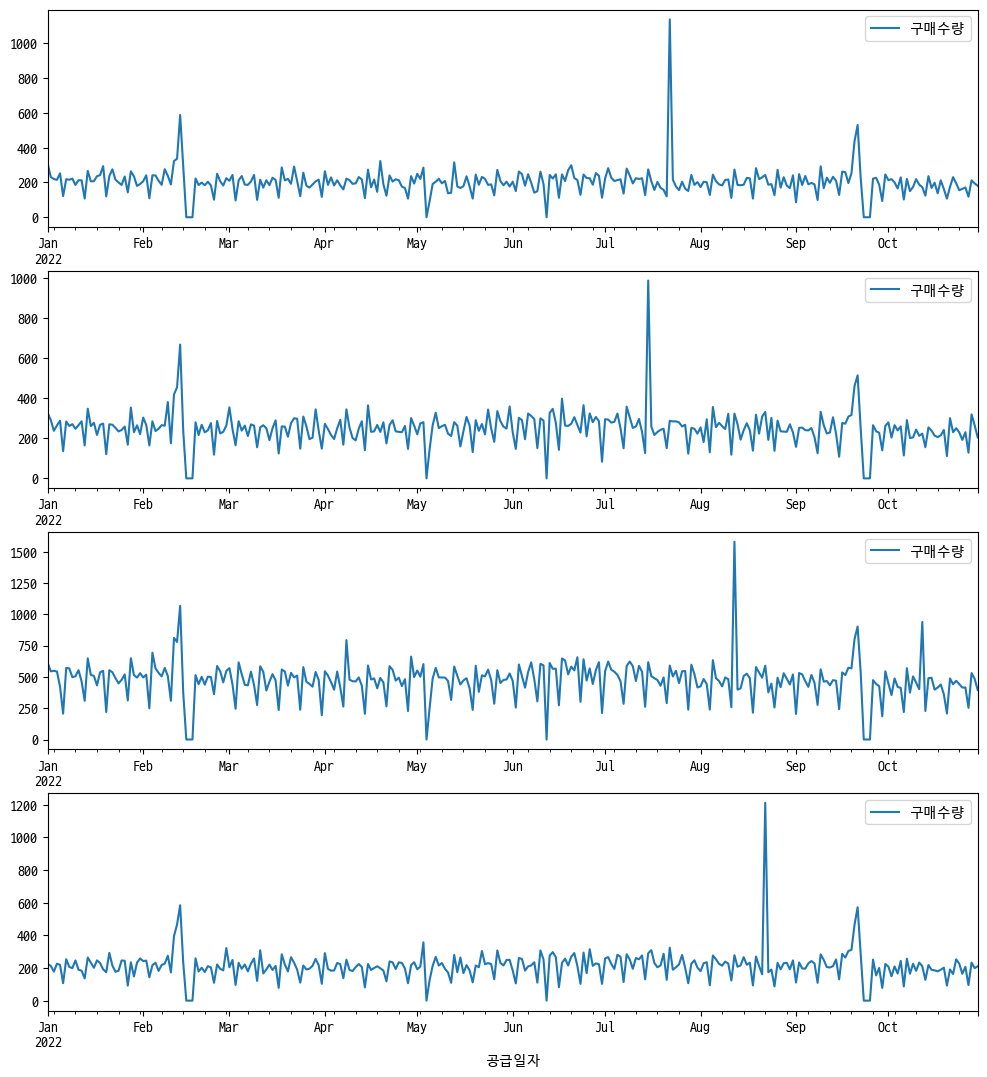

In [51]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12,13))

df_dt_a.plot(ax = ax1)
df_dt_b.plot(ax = ax2)
df_dt_c.plot(ax = ax3)
df_dt_d.plot(ax = ax4)

- a, b, c, d 매장 전부 동일한 양상을 보이는 결과 계절성이 존재한다고 확인된다.

## 계절성 제거 

<Axes: xlabel='공급일자'>

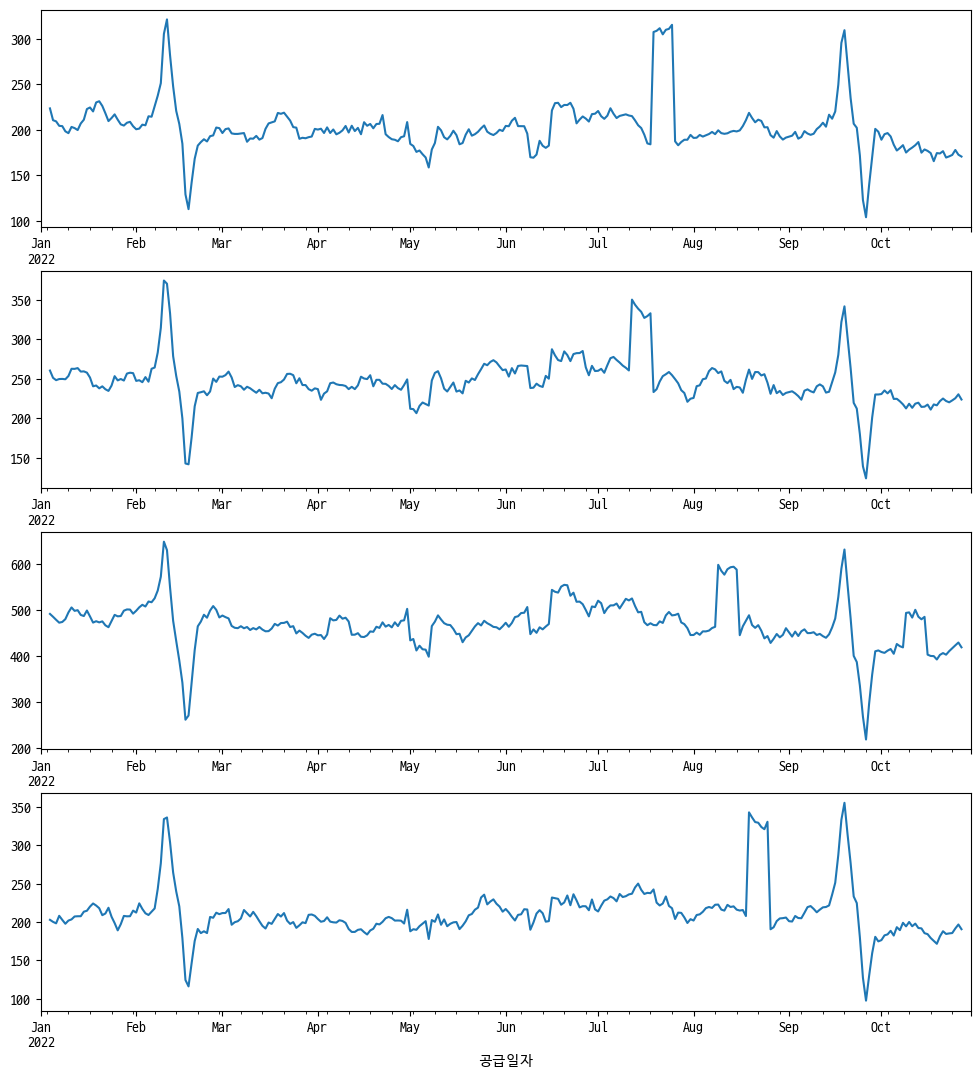

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose

f , (ax1,ax2,ax3,ax4) = plt.subplots(4, figsize = (12,13))

decomposition_a = seasonal_decompose(df_dt_a , model = 'additive')
decomposition_a.trend.plot(ax = ax1)

decomposition_b = seasonal_decompose(df_dt_b , model = 'additive')
decomposition_b.trend.plot(ax = ax2)

decomposition_c = seasonal_decompose(df_dt_c , model = 'additive')
decomposition_c.trend.plot(ax = ax3)

decomposition_d = seasonal_decompose(df_dt_d , model = 'additive')
decomposition_d.trend.plot(ax = ax4)


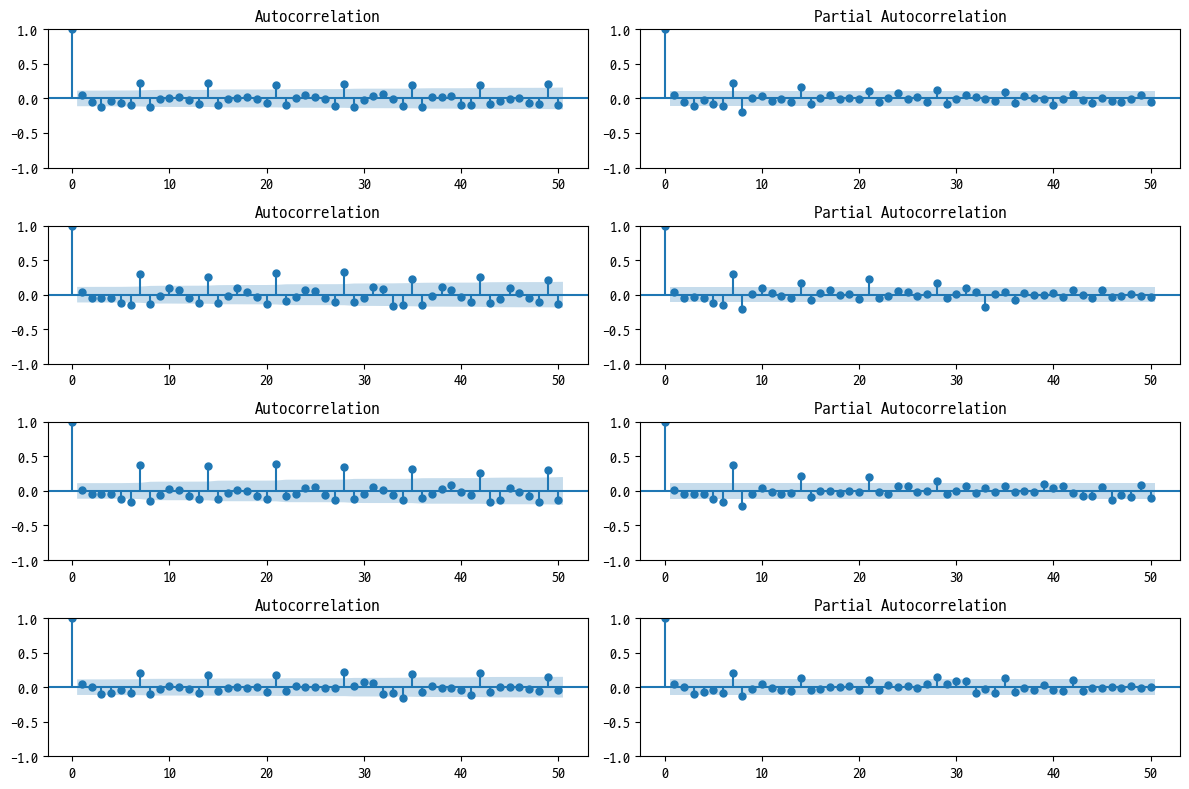

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize = (12,8))

# acf and pacf for A
plt.subplot(421); plot_acf(df_dt_a , lags = 50, ax = plt.gca())
plt.subplot(422); plot_pacf(df_dt_a, lags = 50, ax = plt.gca())

# acf and pacf for B
plt.subplot(423); plot_acf(df_dt_b , lags = 50, ax = plt.gca())
plt.subplot(424); plot_pacf(df_dt_b, lags = 50, ax = plt.gca())

# acf and pacf for C
plt.subplot(425); plot_acf(df_dt_c , lags = 50, ax = plt.gca())
plt.subplot(426); plot_pacf(df_dt_c, lags = 50, ax = plt.gca())

# acf and pacf for D
plt.subplot(427); plot_acf(df_dt_d , lags = 50, ax = plt.gca())
plt.subplot(428); plot_pacf(df_dt_d, lags = 50, ax = plt.gca())
plt.tight_layout()

In [54]:
df_dt_a.reset_index(inplace = True)

In [56]:
from fbprophet import Prophet
my_model = Prophet(interval_width = 0.95)
my_model.fit(df_dt_a)

future_date = my_model.make_future_dataframe(periods = 6*7)

future_date.tail(7)

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
-

In [ ]:
X_a = df_dt[df_dt['구매매장'] == '매장A'].drop('구매수량',axis = 1)
y_a = df_dt[df_dt['구매매장'] == '매장A'][['구매수량']]

for train_index , test_index in tss.split(X_a):
    X_a_train, X_a_test = X_a.iloc[train_index, :], X_a.iloc[test_index , :]
    y_a_train, y_a_test = y_a.iloc[train_index, :], y_a.iloc[test_index , :]

X_a_train.index


DatetimeIndex(['2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01',
               ...
               '2022-09-07', '2022-09-07', '2022-09-07', '2022-09-07',
               '2022-09-07', '2022-09-07', '2022-09-07', '2022-09-07',
               '2022-09-07', '2022-09-07'],
              dtype='datetime64[ns]', name='공급일자', length=42819, freq=None)

<Axes: xlabel='공급일자'>

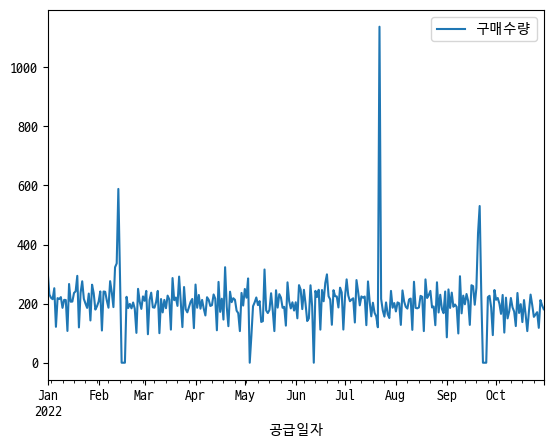

In [ ]:
y_a.resample('D').sum().plot()

In [ ]:
df_join.columns

Index(['공급일자', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장', '구매시각', '계절', '구매시간대', '주소', '성별', '연령', '배송서비스신청여부',
       '모바일알람여부', 'Gold_member', '구매횟수', '최근구매일자', '총구매금액', '연령대', '주구매매장',
       '거리등급', '물품명_분리'],
      dtype='object')

In [ ]:
from kmodes.kmodes import KModes
data = df_join.drop(['공급일자','회원번호','구매수량','구매금액','구매시각','계절','구매시간대','주소','연령','Gold_member','구매횟수','최근구매일자','총구매금액','주구매매장','recency','frequency','monetary','RFM','물품명'], axis = 1)

cost = []
K = range(1,12)
for num in K:
    kmodes = KModes(n_clusters = num ,n_init = 3)
    kmodes.fit_predict(data)
    cost.append(kmodes.cost_)

plt.plot(K, cost, 'bx-')
plt.show()


KeyError: "['recency', 'frequency', 'monetary', 'RFM'] not found in axis"

In [ ]:
kmodes =KModes(n_clusters = 6, n_init = 3)
clusters = kmodes.fit_predict(data)

clusters

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
 
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
# ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
# ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
# ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
# ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
# ax.view_init(30, 185)
# plt.xlabel("Age")
# plt.ylabel("Annual Income (k$)")
# ax.set_zlabel('Spending Score (1-100)')
# plt.show()

NameError: name 'data' is not defined

In [ ]:
data['Cluster'] = clusters

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(data, clusters)

ValueError: could not convert string to float: '정상회원'

In [ ]:
unique , counts = np.unique(clusters, return_counts = True)
counts = counts.reshape(1,6)

countscldf = pd.DataFrame(counts, columns = ['Cluster {}'.format(i) for i in range(6)])

countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,119382,60415,40847,32129,20265,15720


## 데이터 정제 전, 정제 후 비교

In [ ]:
print('데이터 정제 전 : ', df.shape)
print('데이터 정제 후 : ', df_sold.shape)

print('개수 : ', df.shape[0] - df_sold.shape[0])
print('비율 : {:.3f}'.format((df.shape[0] - df_sold.shape[0]) / df.shape[0]))

데이터 정제 전 :  (294625, 12)
데이터 정제 후 :  (288762, 12)
개수 :  5863
비율 : 0.020


In [ ]:
df_join.isnull().sum()

공급일자                0
회원번호                0
조합원상태               0
물품대분류               0
물품중분류               0
물품소분류               0
물품명                 0
구매수량                0
구매금액                0
구매매장                0
반품_원거래일자       288758
구매시각                0
주소                  0
성별                  0
연령                  0
배송서비스신청여부           0
모바일알람여부             0
Gold_member         0
구매횟수                0
최근구매일자              0
총구매금액               0
연령대                 0
dtype: int64

In [ ]:
print(df_join.shape)
print(df.shape)
print(member_modi.shape)

(288762, 22)
(294625, 12)
(11552, 12)


## 연관분석

In [ ]:
## 물품명 연관분석

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
basket = df_join[['공급일자','회원번호' , '물품대분류','물품중분류','물품소분류','물품명']]
market_basket = basket.groupby(['공급일자', '회원번호'])['물품명'].apply(','.join).reset_index()
market_basket_list = market_basket['물품명'].str.split(',').to_list()
flattened = [item for sublist in market_basket_list for item in sublist]
groceries = list(set(flattened))

te = TransactionEncoder()
te_result = te.fit(market_basket_list).transform(market_basket_list)
aprioris = pd.DataFrame(te_result, columns = te.columns_)
itemset = apriori(aprioris, min_support = 0.001, use_colnames = True)
itemset.sort_values('support', ascending = False)

,support,itemsets
103,0.07,(두부(1모:420g))
426,0.04,(콩나물(300g))
361,0.04,(유정란/매장용(15알/국내산))
389,0.03,(찌개용두부(420g))
315,0.02,(오이(3개))
...,...,...
111,0.00,(들기름(160ml))
5,0.00,(간고등어살(대/2쪽/300g))
88,0.00,(당근(300g))
95,0.00,(돈가스소스(240g))


In [ ]:
association_rules(itemset, metric = 'lift', min_threshold = 1).sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(소스160g)),(매콤소스순살닭강정(강정400g),0.00,0.00,0.00,1.00,735.42,0.00,inf,1.00
5,(매콤소스순살닭강정(강정400g),(소스160g)),0.00,0.00,0.00,1.00,735.42,0.00,inf,1.00
0,(소스110g)),(간장소스순살닭강정(강정400g),0.00,0.00,0.00,1.00,508.94,0.00,inf,1.00
1,(간장소스순살닭강정(강정400g),(소스110g)),0.00,0.00,0.00,1.00,508.94,0.00,inf,1.00
7,(콩나물(300g)),(찌개용두부(420g)),0.04,0.03,0.00,0.04,1.18,0.00,1.01,0.16
6,(찌개용두부(420g)),(콩나물(300g)),0.03,0.04,0.00,0.05,1.18,0.00,1.01,0.15
2,(두부(1모:420g)),(콩나물(300g)),0.07,0.04,0.00,0.05,1.11,0.00,1.00,0.11
3,(콩나물(300g)),(두부(1모:420g)),0.04,0.07,0.00,0.08,1.11,0.00,1.01,0.10


- 물품명 끼리의 연관분석을 한 결과
    - 소스(110g)을 산 경우 간장소스순살닭강정을 살 확률이 높고 반대의 경우도 높았다.
    - 콩나물을 살 경우 두부를 상 확률 이 높은 것을 알수 있었다.
    - 마지막으로 콩나물을 살 경우 찌개용 두부와 연관이 있음을 알 수 있었다.

## 물품 소분류 비교

In [ ]:
basket = df_join[['공급일자','회원번호' , '물품대분류','물품중분류','물품소분류','물품명']]
market_basket = basket.groupby(['공급일자', '회원번호'])['물품소분류'].apply(','.join).reset_index()
market_basket_list = market_basket['물품소분류'].str.split(',').to_list()
flattened = [item for sublist in market_basket_list for item in sublist]
groceries = list(set(flattened))

te = TransactionEncoder()
te_result = te.fit(market_basket_list).transform(market_basket_list)
aprioris = pd.DataFrame(te_result, columns = te.columns_)
itemset = apriori(aprioris, min_support = 0.001, use_colnames = True)
itemset

,support,itemsets
0,0.02,( 식사대용)
1,0.00,(가공소금)
2,0.02,(가래떡)
3,0.01,(가지)
4,0.01,(간장)
...,...,...
366,0.00,"(식빵, 스낵, 식사대용)"
367,0.00,"(식빵, 우유/산양유, 식사대용)"
368,0.00,"(식빵, 유정란, 식사대용)"
369,0.00,"(선물, 롤, 케이크)"


In [ ]:
association_rules(itemset, metric = 'lift', min_threshold = 1).sort_values('lift',ascending = False).head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
70,"(선물, 롤)",(케이크),0.00,0.00,0.00,1.00,469.92,0.00,inf,1.00
74,(롤),"(선물, 케이크)",0.00,0.00,0.00,1.00,469.92,0.00,inf,1.00
72,"(롤, 케이크)",(선물),0.00,0.00,0.00,1.00,469.92,0.00,inf,1.00
71,"(선물, 케이크)",(롤),0.00,0.00,0.00,1.00,469.92,0.00,inf,1.00
24,(선물),(롤),0.00,0.00,0.00,1.00,469.92,0.00,inf,1.00
75,(케이크),"(선물, 롤)",0.00,0.00,0.00,1.00,469.92,0.00,inf,1.00
25,(롤),(선물),0.00,0.00,0.00,1.00,469.92,0.00,inf,1.00
26,(롤),(케이크),0.00,0.00,0.00,1.00,469.92,0.00,inf,1.00
27,(케이크),(롤),0.00,0.00,0.00,1.00,469.92,0.00,inf,1.00
28,(선물),(케이크),0.00,0.00,0.00,1.00,469.92,0.00,inf,1.00


## 물품 중분류 비교

In [ ]:
basket = df_join[['공급일자','회원번호' , '물품대분류','물품중분류','물품소분류','물품명']]
market_basket = basket.groupby(['공급일자', '회원번호'])['물품중분류'].apply(','.join).reset_index()
market_basket_list = market_basket['물품중분류'].str.split(',').to_list()
flattened = [item for sublist in market_basket_list for item in sublist]
groceries = list(set(flattened))

te = TransactionEncoder()
te_result = te.fit(market_basket_list).transform(market_basket_list)
aprioris = pd.DataFrame(te_result, columns = te.columns_)
itemset = apriori(aprioris, min_support = 0.001, use_colnames = True)
itemset.sort_values('support', ascending = False)

,support,itemsets
15,0.14,(두부/유부)
44,0.11,(잎/줄기채소)
36,0.11,(알)
8,0.08,(과자)
39,0.07,(열매채소)
...,...,...
288,0.00,"(빵, 멥쌀)"
132,0.00,"(과일채소, 냉동수산)"
289,0.00,"(뿌리채소, 멥쌀)"
318,0.00,"(화장품, 밀가공)"


In [ ]:
association_rules(itemset, metric = 'lift', min_threshold = 1).sort_values('confidence',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
214,(생물수산),(잎/줄기채소),0.01,0.11,0.00,0.16,1.43,0.00,1.06,0.30
283,"(두부/유부, 양념채소)",(잎/줄기채소),0.01,0.11,0.00,0.15,1.39,0.00,1.05,0.28
255,(쌈채소류),(잎/줄기채소),0.03,0.11,0.00,0.15,1.38,0.00,1.05,0.29
63,(과일채소),(잎/줄기채소),0.04,0.11,0.01,0.15,1.33,0.00,1.04,0.26
287,"(열매채소, 두부/유부)",(잎/줄기채소),0.01,0.11,0.00,0.15,1.31,0.00,1.04,0.24
...,...,...,...,...,...,...,...,...,...,...
83,(과자),(차),0.08,0.01,0.00,0.01,1.11,0.00,1.00,0.11
26,(잎/줄기채소),(고구마),0.11,0.01,0.00,0.01,1.09,0.00,1.00,0.10
140,(잎/줄기채소),(말린나물/건재),0.11,0.01,0.00,0.01,1.03,0.00,1.00,0.04
288,(잎/줄기채소),"(열매채소, 두부/유부)",0.11,0.01,0.00,0.01,1.31,0.00,1.00,0.27


## 물품 대분류 비교

In [ ]:
basket = df_join[['공급일자','회원번호' , '물품대분류','물품중분류','물품소분류','물품명']]
market_basket = basket.groupby(['공급일자', '회원번호'])['물품대분류'].apply(','.join).reset_index()
market_basket_list = market_basket['물품대분류'].str.split(',').to_list()
flattened = [item for sublist in market_basket_list for item in sublist]
groceries = list(set(flattened))

te = TransactionEncoder()
te_result = te.fit(market_basket_list).transform(market_basket_list)
aprioris = pd.DataFrame(te_result, columns = te.columns_)
itemset = apriori(aprioris, min_support = 0.02, use_colnames = True)
itemset.sort_values('support',ascending = False)

,support,itemsets
10,0.38,(채소)
11,0.30,(축산물)
0,0.25,(간식)
2,0.22,(반찬)
5,0.12,(수산)
27,0.09,"(채소, 축산물)"
6,0.09,(양념/가루)
7,0.08,(음료)
15,0.07,"(채소, 간식)"
19,0.07,"(채소, 반찬)"


## 향상도 분석

In [ ]:
association_rules(itemset, metric = 'lift', min_threshold = 1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(음료),(간식),0.08,0.25,0.02,0.26,1.02,0.00,1.01,0.02
1,(간식),(음료),0.25,0.08,0.02,0.09,1.02,0.00,1.00,0.03
2,"(채소, 간식)",(축산물),0.07,0.30,0.02,0.30,1.02,0.00,1.01,0.02
3,(축산물),"(채소, 간식)",0.30,0.07,0.02,0.07,1.02,0.00,1.00,0.02


In [ ]:
전체 거래 중에 음료와 간식을 모두 구매한 비율은 2% 이며, 음료를 구매한 고객 중 약 26 %는 간식을 구매하였다.
이 사실을 알고 음료에 대한 마케팅을 한다면 이 사실을 모를 때보다 효과가 2% 증가한다는 것을 의미한다.

또한 채소,간식과 축산물을 모두 구매한 비율은 2%이며, 채소, 간식을 구매한 고객 중 약 30%는 축산물을 구매하였다.
이 사실을 알고 음료에 대한 마케팅을 한다면 이 사실을 모를 때보다 효과가 2% 증가한다는 것을 의미한다.

## 협업 필터링

- nearest neighbor based collaborative filtering
- 사용자, 아이템 행렬에서 사용자가 아직 평가하지 않은 아이템을 예측하는 것이 목표이다.

1. 아이템 기반의 협업 필터링
    - ~한 item을 소비한 고객들은 다음과 같은 상품도 구매하였다.

## 물품대분류

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

basket = df_join[['공급일자','회원번호' , '물품대분류','물품중분류','물품소분류','물품명']]
basket['구매여부'] = 1

basket_pivot = pd.pivot_table(data = basket, columns = '회원번호',index = '물품대분류',values = '구매여부', aggfunc = 'sum',fill_value = 0)

item_based_collabor = cosine_similarity(basket_pivot)
item_based_collabor = pd.DataFrame(data = item_based_collabor , index = basket_pivot.index, columns = basket_pivot.index)

def get_item_based_collabor(item):
    return item_based_collabor[item].sort_values(ascending = False)[1:6]
display(pd.DataFrame(get_item_based_collabor('간식')))
display(pd.DataFrame(get_item_based_collabor('음료')))
display(pd.DataFrame(get_item_based_collabor('축산물')))


/var/folders/kg/2nf2sj7525b36vm0888t1whm0000gn/T/ipykernel_58263/1018708531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket['구매여부'] = 1


,간식
물품대분류,
축산물,0.78
반찬,0.75
음료,0.73
양념/가루,0.72
채소,0.71


,음료
물품대분류,
간식,0.73
축산물,0.65
양념/가루,0.64
반찬,0.64
수산,0.58


,축산물
물품대분류,
반찬,0.80
채소,0.80
간식,0.78
수산,0.76
양념/가루,0.73


## 물품 중분류

In [ ]:
basket_pivot = pd.pivot_table(data = basket, columns = '회원번호',index = '물품중분류',values = '구매여부', aggfunc = 'sum',fill_value = 0)

item_based_collabor = cosine_similarity(basket_pivot)
item_based_collabor = pd.DataFrame(data = item_based_collabor , index = basket_pivot.index, columns = basket_pivot.index)

item_based_collabor
def get_item_based_collabor(item):
    return item_based_collabor[item].sort_values(ascending = False)[1:6]

pd.DataFrame(get_item_based_collabor('감자'))

KeyError: '구매여부'

## 물품 소분류


In [ ]:
basket_pivot = pd.pivot_table(data = basket, columns = '회원번호',index = '물품소분류',values = '구매여부', aggfunc = 'sum',fill_value = 0)

item_based_collabor = cosine_similarity(basket_pivot)
item_based_collabor = pd.DataFrame(data = item_based_collabor , index = basket_pivot.index, columns = basket_pivot.index)

item_based_collabor
def get_item_based_collabor(item):
    return item_based_collabor[item].sort_values(ascending = False)[:6]

get_item_based_collabor('휴지')

물품소분류
휴지    1.00
김가공   0.32
스낵    0.30
양파    0.30
기름    0.30
두부    0.29
Name: 휴지, dtype: float64

## 물품명


In [ ]:
basket_pivot = pd.pivot_table(data = basket, columns = '회원번호',index = '물품명',values = '구매여부', aggfunc = 'sum',fill_value = 0)

item_based_collabor = cosine_similarity(basket_pivot)
item_based_collabor = pd.DataFrame(data = item_based_collabor , index = basket_pivot.index, columns = basket_pivot.index)

item_based_collabor
def get_item_based_collabor(item):
    return item_based_collabor[item].sort_values(ascending = False)[:6]

get_item_based_collabor('구운돌김(15장)')

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


물품명
구운돌김(15장)            1.00
홍두깨-성남용인             0.18
구운파래참김(15장)          0.17
뽕잎가루(200g)           0.16
한우장조림/유기(600g/국내산)   0.15
새송이버섯(300g)          0.15
Name: 구운돌김(15장), dtype: float64